In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
cols=["Class","Alcohol","Malic_acid","Ash","Alcalinity_ash","Magnesium","Total_phenols","Flavanoids","Nonflavanoid_phenols","Proanthocyanins" ,"Color_intensity","Hue","OD280/OD315 of diluted wines","Proline"]
data=pd.read_csv("wine.csv",names=cols) #loading data
X=data.iloc[:,1:]
Y=data["Class"]-1 # changed wine classes from 1,2,3 to 0,1,2
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=12) # splitting the dataset into test and train
#standarization of features
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Testing the neural network**

In [36]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(10,activation=tf.nn.relu),
                         tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(3,activation=tf.nn.softmax)])
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=35,batch_size=16)


Epoch 1/35
8/8 [==============================] - 0s 872us/step - loss: 1.2691 - accuracy: 0.1613
Epoch 2/35
8/8 [==============================] - 0s 750us/step - loss: 1.2062 - accuracy: 0.2661
Epoch 3/35
8/8 [==============================] - 0s 875us/step - loss: 1.1581 - accuracy: 0.3145
Epoch 4/35
8/8 [==============================] - 0s 877us/step - loss: 1.1174 - accuracy: 0.3548
Epoch 5/35
8/8 [==============================] - 0s 875us/step - loss: 1.0861 - accuracy: 0.4516
Epoch 6/35
8/8 [==============================] - 0s 750us/step - loss: 1.0567 - accuracy: 0.5000
Epoch 7/35
8/8 [==============================] - 0s 875us/step - loss: 1.0306 - accuracy: 0.5484
Epoch 8/35
8/8 [==============================] - 0s 875us/step - loss: 1.0020 - accuracy: 0.5484
Epoch 9/35
8/8 [==============================] - 0s 625us/step - loss: 0.9729 - accuracy: 0.6048
Epoch 10/35
8/8 [==============================] - 0s 500us/step - loss: 0.9436 - accuracy: 0.6452
Epoch 11/35
8/8 [==

[0.06025603413581848, 1.0]

In [38]:
print(model.evaluate(X_test,Y_test,batch_size=16))

4/4 [==============================] - 0s 752us/step - loss: 0.0603 - accuracy: 1.0000
[0.06025603413581848, 1.0]


**The accuracy of this neural network on test dataset is 100%**

### Optimal learning rate

In [31]:
learning_rate=np.linspace(0.0005,0.5,20)
accuracy_learning_rate=[]
for i in learning_rate:
    model=tf.keras.models.Sequential([tf.keras.layers.Dense(10,activation=tf.nn.relu),
                         tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(3,activation=tf.nn.softmax)])
    model.compile(optimizer=tf.optimizers.Adam(lr=i),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.fit(X_train,Y_train,epochs=35,batch_size=21)
    accuracy_learning_rate.append(model.evaluate(X_test,Y_test,batch_size=21))
df1=pd.DataFrame(accuracy_learning_rate,columns=['loss','Accuracy']) #storing all the accuries in the Dataframe
df1["learning rate"]=[i for i in learning_rate]


Epoch 1/35
6/6 [==============================] - 0s 831us/step - loss: 1.1414 - accuracy: 0.4032
Epoch 2/35
6/6 [==============================] - 0s 830us/step - loss: 1.1163 - accuracy: 0.4032
Epoch 3/35
6/6 [==============================] - 0s 833us/step - loss: 1.0947 - accuracy: 0.4113
Epoch 4/35
6/6 [==============================] - 0s 1ms/step - loss: 1.0720 - accuracy: 0.4274
Epoch 5/35
6/6 [==============================] - 0s 1ms/step - loss: 1.0534 - accuracy: 0.4355
Epoch 6/35
6/6 [==============================] - 0s 834us/step - loss: 1.0374 - accuracy: 0.4839
Epoch 7/35
6/6 [==============================] - 0s 1ms/step - loss: 1.0216 - accuracy: 0.4919
Epoch 8/35
6/6 [==============================] - 0s 1000us/step - loss: 1.0069 - accuracy: 0.5000
Epoch 9/35
6/6 [==============================] - 0s 1ms/step - loss: 0.9920 - accuracy: 0.5081
Epoch 10/35
6/6 [==============================] - 0s 1ms/step - loss: 0.9772 - accuracy: 0.5403
Epoch 11/35
6/6 [===========

In [32]:
df1.sort_values("Accuracy")

,loss,Accuracy,learning rate
13,1.091424,0.333333,0.342263
18,1.168523,0.333333,0.473711
16,1.016647,0.425926,0.421132
17,0.654827,0.574074,0.447421
12,0.815738,0.574074,0.315974
10,1.415239,0.592593,0.263395
15,0.658158,0.648148,0.394842
19,0.495903,0.685185,0.500000
14,0.485326,0.703704,0.368553
11,0.225148,0.907407,0.289684


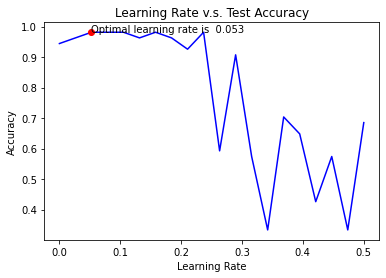

In [33]:
idx=df1[df1["Accuracy"]==df1.max()["Accuracy"]]
_ = plt.plot(df1["learning rate"],df1['Accuracy'],'b')
_ = plt.plot(idx.iloc[0,2],idx.iloc[0,1],'ro')
_ = plt.annotate(f'Optimal learning rate is  {idx.iloc[0,2]:.3f}',(idx.iloc[0,2],idx.iloc[0,1]))
_ = plt.xlabel('Learning Rate')
_ = plt.ylabel('Accuracy')
_ = plt.title('Learning Rate v.s. Test Accuracy')

**<center>The optimal learning rate is 0.053 there are actually 5 learning rates with optimal accuracy, all of these are residing in range of 0.04 to 0.15</center>**

### Optimal Batch Size

In [56]:
kk=np.linspace(5,80,15)
batch_size=[int(i) for i in kk]
accuracy_batch_size=[]
for i in batch_size:
    model=tf.keras.models.Sequential([tf.keras.layers.Dense(10,activation=tf.nn.relu),
                         tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(3,activation=tf.nn.softmax)])
    model.compile(optimizer=tf.optimizers.Adam(lr=0.025),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.fit(X_train,Y_train,epochs=20,batch_size=i)
    accuracy_batch_size.append(model.evaluate(X_test,Y_test,batch_size=i))
df2=pd.DataFrame(accuracy_batch_size,columns=['loss','Accuracy'])#storing all the accuries in the Dataframe
df2["batch size"]=[i for i in batch_size]


Epoch 1/20
25/25 [==============================] - 0s 720us/step - loss: 0.3192 - accuracy: 0.9516
Epoch 2/20
25/25 [==============================] - 0s 679us/step - loss: 0.0853 - accuracy: 0.9677
Epoch 3/20
25/25 [==============================] - 0s 680us/step - loss: 0.1479 - accuracy: 0.9677
Epoch 4/20
25/25 [==============================] - 0s 679us/step - loss: 0.0740 - accuracy: 0.9758
Epoch 5/20
25/25 [==============================] - 0s 598us/step - loss: 0.0352 - accuracy: 0.9839
Epoch 6/20
25/25 [==============================] - 0s 519us/step - loss: 0.0096 - accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 0s 520us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/20
25/25 [==============================] - 0s 520us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/20
25/25 [==============================] - 0s 560us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 0s 560us/step - loss: 8.4773e-04 - accuracy: 1.

In [57]:
df2.sort_values("Accuracy")

,loss,Accuracy,batch size
0,0.153818,0.962963,5
7,0.277499,0.962963,42
1,0.286038,0.981481,10
2,0.126087,0.981481,15
4,0.210518,0.981481,26
5,0.084366,0.981481,31
6,0.212241,0.981481,37
8,0.206078,0.981481,47
9,0.198665,0.981481,53
10,0.028363,0.981481,58


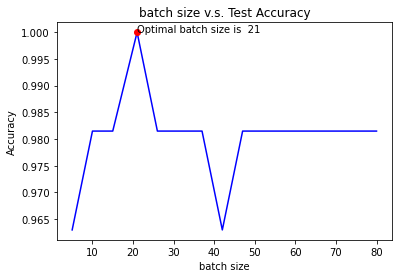

In [58]:
idx2=df2[df2["Accuracy"]==df2.max()["Accuracy"]]
_ = plt.plot(df2["batch size"],df2['Accuracy'],'b')
_ = plt.plot(idx2.iloc[0,2],idx2.iloc[0,1],'ro')
_ = plt.annotate(f'Optimal batch size is  {idx2.iloc[0,2]:.0f}',(idx2.iloc[0,2],idx2.iloc[0,1]))
_ = plt.xlabel('batch size')
_ = plt.ylabel('Accuracy')
_ = plt.title('batch size v.s. Test Accuracy')

**<center>The optimal batch size is 21</center>**

### Accuracy vs training size plot

In [43]:
sizes=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
accuracy_train_set=[]
predictions=0
for i in sizes:
    if(i!=1):
        Xtrain,cv_X,Ytrain,cv_Y=train_test_split(X_train,Y_train,train_size=i)
    else:
        Xtrain=X_train
        Ytrain=Y_train
    model=tf.keras.models.Sequential([tf.keras.layers.Dense(10,activation=tf.nn.relu),
                         tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(3,activation=tf.nn.softmax)])
    model.compile(optimizer=tf.optimizers.Adam(lr=0.015),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.fit(Xtrain,Ytrain,epochs=20,batch_size=32)
    accuracy_train_set.append(model.evaluate(X_test,Y_test,batch_size=32))
df3=pd.DataFrame(accuracy_train_set,columns=['loss','Accuracy'])#storing all the accuries in the Dataframe
df3["training set ratio"]=[i for i in sizes]

Epoch 1/20
1/1 [==============================] - 0s 0s/step - loss: 1.0747 - accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 0s/step - loss: 0.9668 - accuracy: 0.3750
Epoch 3/20
1/1 [==============================] - 0s 998us/step - loss: 0.8708 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 2ms/step - loss: 0.7955 - accuracy: 0.5417
Epoch 5/20
1/1 [==============================] - 0s 997us/step - loss: 0.7301 - accuracy: 0.5417
Epoch 6/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.5833
Epoch 7/20
1/1 [==============================] - 0s 0s/step - loss: 0.6036 - accuracy: 0.6250
Epoch 8/20
1/1 [==============================] - 0s 999us/step - loss: 0.5513 - accuracy: 0.6667
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7083
Epoch 10/20
1/1 [==============================] - 0s 981us/step - loss: 0.4678 - accuracy: 0.8333
Epoch 11/20
1/1 [=================

In [52]:
df3.sort_values("Accuracy")

,loss,Accuracy,training set ratio
0,0.414361,0.925926,0.2
1,0.305082,0.925926,0.3
2,0.265182,0.925926,0.4
3,0.098284,0.962963,0.5
5,0.126555,0.962963,0.7
8,0.080659,0.962963,1.0
4,0.064317,0.981481,0.6
7,0.109858,0.981481,0.9
6,0.001691,1.000000,0.8


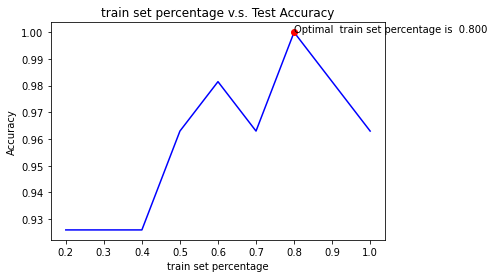

In [55]:
idx3=df3[df3["Accuracy"]==df3.max()["Accuracy"]]
_ = plt.plot(df3["training set ratio"],df3['Accuracy'],'b')
_ = plt.plot(idx3.iloc[0,2],idx3.iloc[0,1],'ro')
_ = plt.annotate(f'Optimal  train set percentage is  {idx3.iloc[0,2]:.3f}',(idx3.iloc[0,2],idx3.iloc[0,1]))
_ = plt.xlabel('train set percentage')
_ = plt.ylabel('Accuracy')
_ = plt.title('train set percentage v.s. Test Accuracy')

### Accuracy vs features percentage

In [46]:
accuracy_features_size=[]
features_list=[0,1,2,3,4,5,6,7,8,9,10,11,12]
features_size=[int(i*13) for i in sizes]
for i in features_size:
    sel_features=random.sample(features_list,i)
    Xtrain=X_train[:,sel_features]
    Xtest=X_test[:,sel_features]
    model=tf.keras.models.Sequential([tf.keras.layers.Dense(13,activation=tf.nn.relu),
                         tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(10,activation=tf.nn.relu),
                        tf.keras.layers.Dense(3,activation=tf.nn.softmax)])
    model.compile(optimizer=tf.optimizers.Adam(lr=0.015),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.fit(Xtrain,Y_train,epochs=20,batch_size=32)
    accuracy_features_size.append(model.evaluate(Xtest,Y_test,batch_size=32))
df4=pd.DataFrame(accuracy_features_size,columns=['loss','Accuracy']) #storing all the accuries in the Dataframe
df4["feature set ratio"]=[i for i in sizes]  

Epoch 1/20
4/4 [==============================] - 0s 0s/step - loss: 1.0488 - accuracy: 0.4274
Epoch 2/20
4/4 [==============================] - 0s 990us/step - loss: 0.9346 - accuracy: 0.5242
Epoch 3/20
4/4 [==============================] - 0s 999us/step - loss: 0.8550 - accuracy: 0.6290
Epoch 4/20
4/4 [==============================] - 0s 1ms/step - loss: 0.8170 - accuracy: 0.6210
Epoch 5/20
4/4 [==============================] - 0s 1000us/step - loss: 0.8266 - accuracy: 0.5565
Epoch 6/20
4/4 [==============================] - 0s 760us/step - loss: 0.7874 - accuracy: 0.6613
Epoch 7/20
4/4 [==============================] - 0s 751us/step - loss: 0.8062 - accuracy: 0.5806
Epoch 8/20
4/4 [==============================] - 0s 753us/step - loss: 0.7806 - accuracy: 0.6048
Epoch 9/20
4/4 [==============================] - 0s 754us/step - loss: 0.7720 - accuracy: 0.6048
Epoch 10/20
4/4 [==============================] - 0s 750us/step - loss: 0.7557 - accuracy: 0.6290
Epoch 11/20
4/4 [======

In [53]:
df4.sort_values("Accuracy")

,loss,Accuracy,feature set ratio
1,0.526648,0.685185,0.3
0,0.711238,0.740741,0.2
3,0.487270,0.907407,0.5
2,0.396684,0.925926,0.4
4,0.233261,0.962963,0.6
5,0.235491,0.962963,0.7
6,0.199779,0.981481,0.8
7,0.037150,0.981481,0.9
8,0.113504,0.981481,1.0


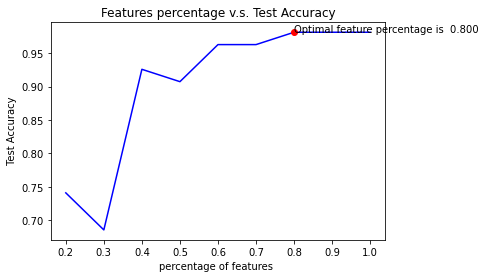

In [54]:
idx4=df4[df4["Accuracy"]==df4.max()["Accuracy"]]
_ = plt.plot(df4["feature set ratio"],df4['Accuracy'],'b')
_ = plt.plot(idx4.iloc[0,2],idx4.iloc[0,1],'ro')
_ = plt.annotate(f'Optimal feature percentage is  {idx4.iloc[0,2]:.3f}',(idx4.iloc[0,2],idx4.iloc[0,1]))
_ = plt.xlabel('percentage of features ')
_ = plt.ylabel(' Test Accuracy')
_ = plt.title('Features percentage v.s. Test Accuracy')